In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad
import scipy.stats

In [94]:
target = 150

In [120]:
smb = pd.read_csv("month_factors.csv")

In [121]:
smb["del x"] = np.nan
smb["abs dist"] = abs(smb["SMB"] - smb.iloc[target-1]["SMB"])
for i in range(1, target+1):
    smb.loc[i, "del x"] = smb["SMB"][i] - smb["SMB"][i-1]

In [127]:
smb[:target+1]

,Date,Mkt-RF,SMB,HML,RF,del x,abs dist
0,1990-07-31,0.035909,0.022727,-0.015909,0.03,NaN,0.055000
1,1990-08-31,-0.478261,-0.080435,0.020000,0.03,-0.103162,0.158162
2,1990-09-30,-0.624000,0.072000,0.044000,0.03,0.152435,0.005727
3,1990-10-31,0.394348,-0.315652,-0.185217,0.03,-0.387652,0.393379
4,1990-11-30,-0.166364,0.063182,0.050000,0.03,0.378834,0.014545
...,...,...,...,...,...,...,...
146,2002-09-30,-0.508571,0.135238,0.050952,0.01,0.210238,0.057511
147,2002-10-31,0.265217,-0.220000,-0.150870,0.01,-0.355238,0.297727
148,2002-11-30,0.245238,0.003333,-0.032857,0.01,0.223333,0.074394
149,2002-12-31,-0.193182,0.077727,0.166818,0.01,0.074394,0.000000


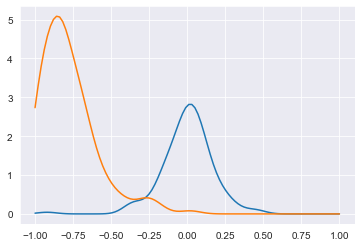

In [107]:
delspace = np.linspace(-1,1,100)
delkernel = scipy.stats.gaussian_kde(np.array(smb["del x"][1:target]))

distspace = np.linspace(0,1,100)
distkernel = scipy.stats.gaussian_kde(np.array(smb["abs dist"][1:target]))

plt.plot(delspace, delkernel.evaluate(delspace))
plt.plot(delspace, distkernel.evaluate(distspace))

In [109]:
delx_weights = np.zeros((len(smb["del x"][:target]), 1))

In [111]:
for i in range(len(smb["del x"][:target])):
    delx_weights[i][0] = distkernel.evaluate(smb["abs dist"][i])

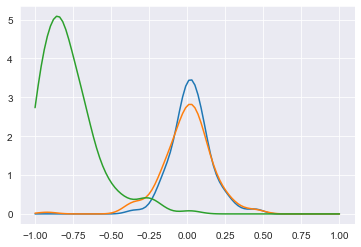

In [112]:
wdelkernel = scipy.stats.gaussian_kde(np.array(smb["del x"][1:target]), weights=delx_weights[1:].ravel())

plt.plot(delspace, wdelkernel.evaluate(delspace))
plt.plot(delspace, delkernel.evaluate(delspace))
plt.plot(delspace, distkernel.evaluate(distspace))

In [119]:
quad(lambda x: x*wdelkernel.evaluate(x), -1, 1)

(0.026292931797509193, 2.473159503907137e-11)

In [ ]:
def predict_delx(factors, range, end):
    smb = pd.read_csv("month_factors.csv")
    for i in range(range, end):
